In [1]:
import pandas as pd

In [2]:
libros_data = pd.read_csv("data_libros.csv")
libros_data.head()

,title,rating,name,num_reviews,genre
0,Words of Radiance,4.75,Brandon Sanderson,16467.00,fantasy
1,Heartstopper: Volume Four,4.67,Alice Oseman,24694.00,romance
2,The Way of Kings,4.64,Brandon Sanderson,26924.00,fantasy
3,Heartstopper: Volume Three,4.63,Alice Oseman,26083.00,romance
4,A Court of Mist and Fury,4.62,Sarah J. Maas,74155.00,fantasy


In [20]:
libros_data["num_reviews"]=libros_data["num_reviews"].apply(str).str.replace(',', '') #convertir de string a float 

libros_data

,title,rating,name,num_reviews,genre
0,Words of Radiance,4.75,Brandon Sanderson,16467.00,fantasy
1,Heartstopper: Volume Four,4.67,Alice Oseman,24694.00,romance
2,The Way of Kings,4.64,Brandon Sanderson,26924.00,fantasy
3,Heartstopper: Volume Three,4.63,Alice Oseman,26083.00,romance
4,A Court of Mist and Fury,4.62,Sarah J. Maas,74155.00,fantasy
...,...,...,...,...,...
1534,A Simple Favor,3.28,Darcey Bell,6301.00,thriller
1535,Genuine Fraud,3.26,E. Lockhart,6470.00,thriller
1536,The Dinner,3.23,Herman Koch,18128.00,thriller
1537,Leave the World Behind,3.20,Rumaan Alam,16352.00,thriller


In [22]:
libros_data2 = libros_data[["rating", "num_reviews"]].astype(float)
libros_data2 = libros_data2.head(50)
libros_data2

,rating,num_reviews
0,4.75,16467.0
1,4.67,24694.0
2,4.64,26924.0
3,4.63,26083.0
4,4.62,74155.0
5,4.61,54178.0
6,4.61,25709.0
7,4.61,11521.0
8,4.61,7833.0
9,4.58,69913.0


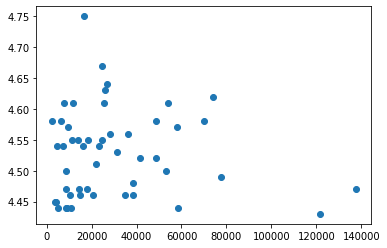

In [23]:
import matplotlib.pyplot as plt 
x = libros_data2["num_reviews"]
y = libros_data2["rating"]

plt.scatter(x, y)
plt.show()

In [28]:
import numpy as np
barx = np.mean(x)
bary = np.mean(y)
print(barx, bary)

29732.92 4.529


In [29]:
varx = np.var(x, ddof=-1)
covxy = np.cov(x, y, ddof= 1) 

varx, covxy

(782035678.7388235, array([[ 8.13955502e+08, -1.37065184e+02],
        [-1.37065184e+02,  5.09081633e-03]]))

In [30]:
print(varx)

782035678.7388235


In [31]:
covxy = covxy[0,1]
covxy

-137.06518367347059

In [32]:
beta1 = covxy/varx 
beta0 = bary - beta1*barx

print(beta0, beta1)

4.534211204874336 -1.75267174375616e-07


##Fórmula Regresión Lineal 
y = 4.53 - 175.26

<function matplotlib.pyplot.show(*args, **kw)>

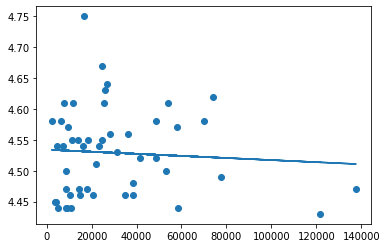

In [33]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y) 

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show